# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.7134928915660187

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.7136229487543864

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.7322991109041611

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.7273110396701877

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [7]:
"""
By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances 
from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – 
silhouette and calinski_harabasz. 
The silhouette score calculates the mean Silhouette Coefficient of all samples, while the 
calinski_harabasz score computes the ratio of dispersion between and within clusters.
"""

'\nBy default, the scoring parameter metric is set to distortion, which computes the sum of squared distances \nfrom each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – \nsilhouette and calinski_harabasz. \nThe silhouette score calculates the mean Silhouette Coefficient of all samples, while the \ncalinski_harabasz score computes the ratio of dispersion between and within clusters.\n'

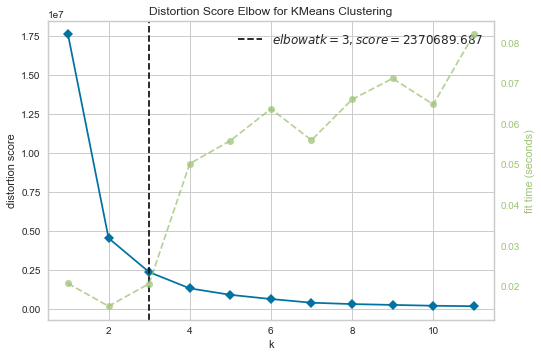

In [27]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

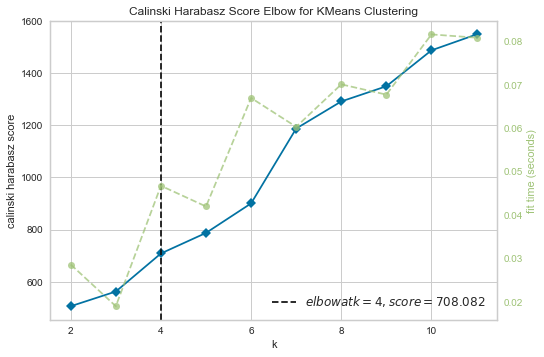

In [29]:
visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)       
visualizer.show()  

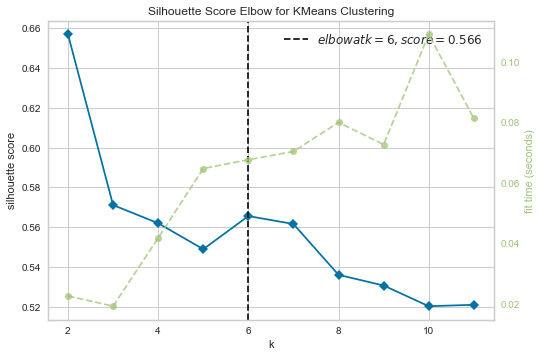

In [31]:
visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='silhouette')

visualizer.fit(X)       
visualizer.show()  

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [11]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=8)
agg.fit(X)

labels = agg.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.6853988108002365

In [12]:
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X)

labels = agg.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.6409697120616711

In [13]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

labels = agg.labels_
metrics.silhouette_score(X, labels, metric='sqeuclidean')

0.7238152741153283

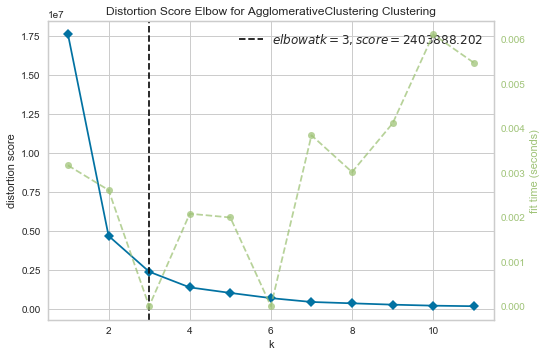

In [32]:
visualizer = KElbowVisualizer(agg, k=(1,12))

visualizer.fit(X)        
visualizer.show() 

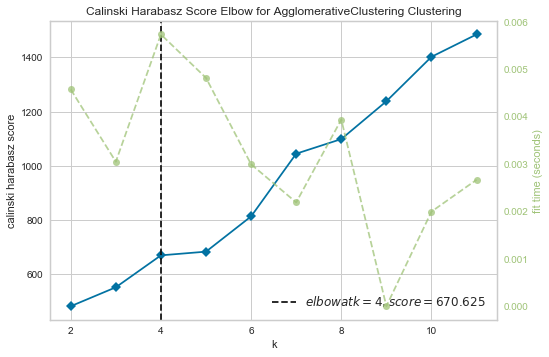

In [34]:
visualizer = KElbowVisualizer(agg, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)       
visualizer.show()  

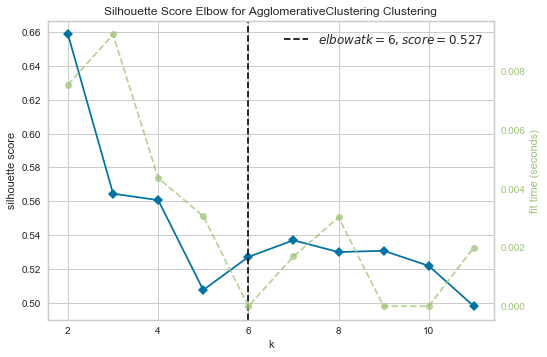

In [35]:
visualizer = KElbowVisualizer(agg, k=(2,12), metric='silhouette')

visualizer.fit(X)       
visualizer.show()  

In [17]:
"""
In general we have the best results with K-Means, with number of clusters 3, score 0.73

With K-Means checking the distortion score the elbow is at k=3, with Agglomerative we get the same result.
With K-Means checking the calinski harabasz score the elbow is at k=4, with Agglomerative we get the same result.
With K-Means checking the silhouette score the elbow is at k=6, with Agglomerative we get the same result.
"""

'\nIn general we have beter results with K-Means, with number of clusters 3, score 0.73\n\nWith K-Means checking the distortion score the elbow is at k=4, with Agglomerative we get the same result.\nWith K-Means checking the calinski harabasz score the elbow is at k=4, with Agglomerative we get the same result.\nWith K-Means checking the silhouette score the elbow is at k=6, with Agglomerative the elbox is at k=6.\n'

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [18]:
data_clusters3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(X)

data_clusters3.fit(X)
labels = data_clusters3.labels_

In [19]:
X = pd.DataFrame(X, columns=wine['feature_names'])

In [20]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = data_clusters3.labels_

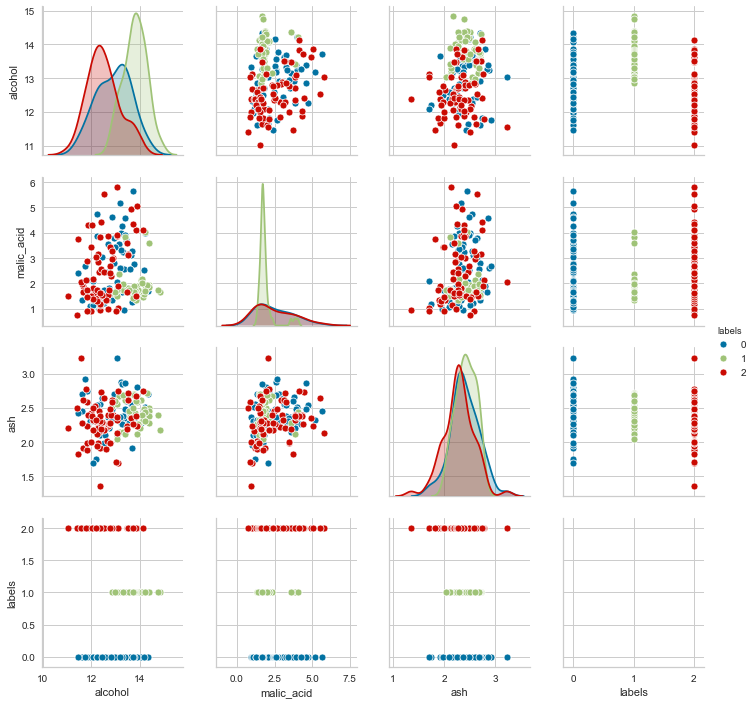

In [22]:
#Primer bin

sns.pairplot(X[bin1], hue='labels')

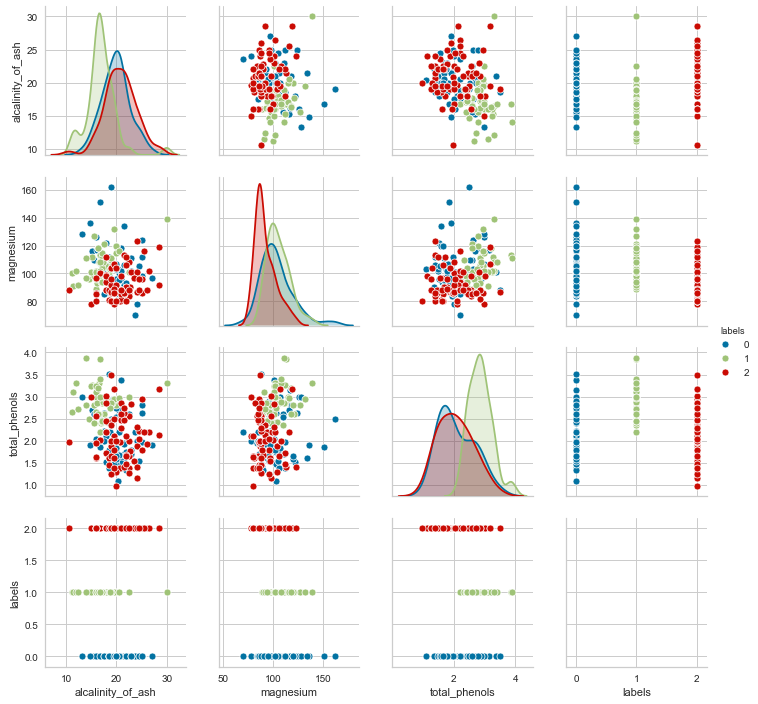

In [23]:
#Segundo bin

sns.pairplot(X[bin2], hue='labels')

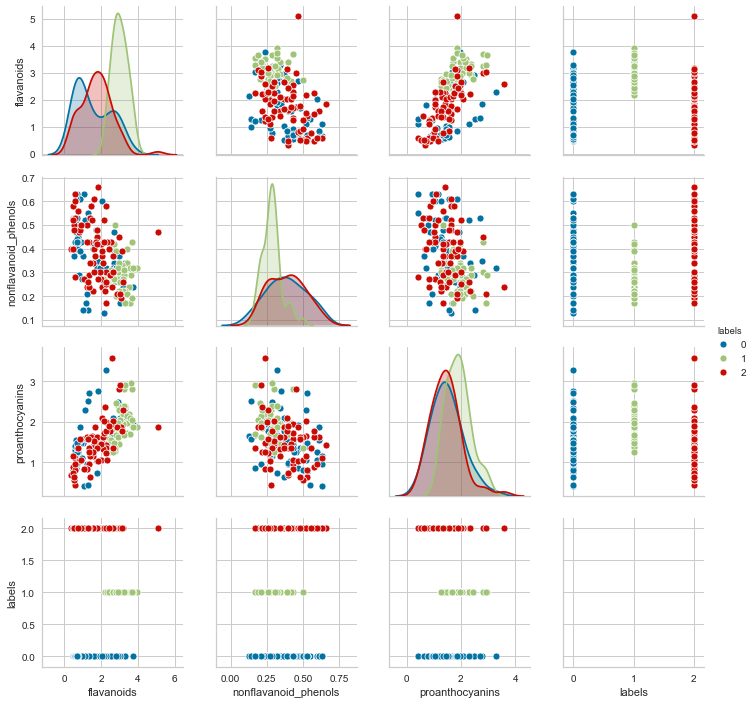

In [24]:
#Tercer bin

sns.pairplot(X[bin3], hue='labels')

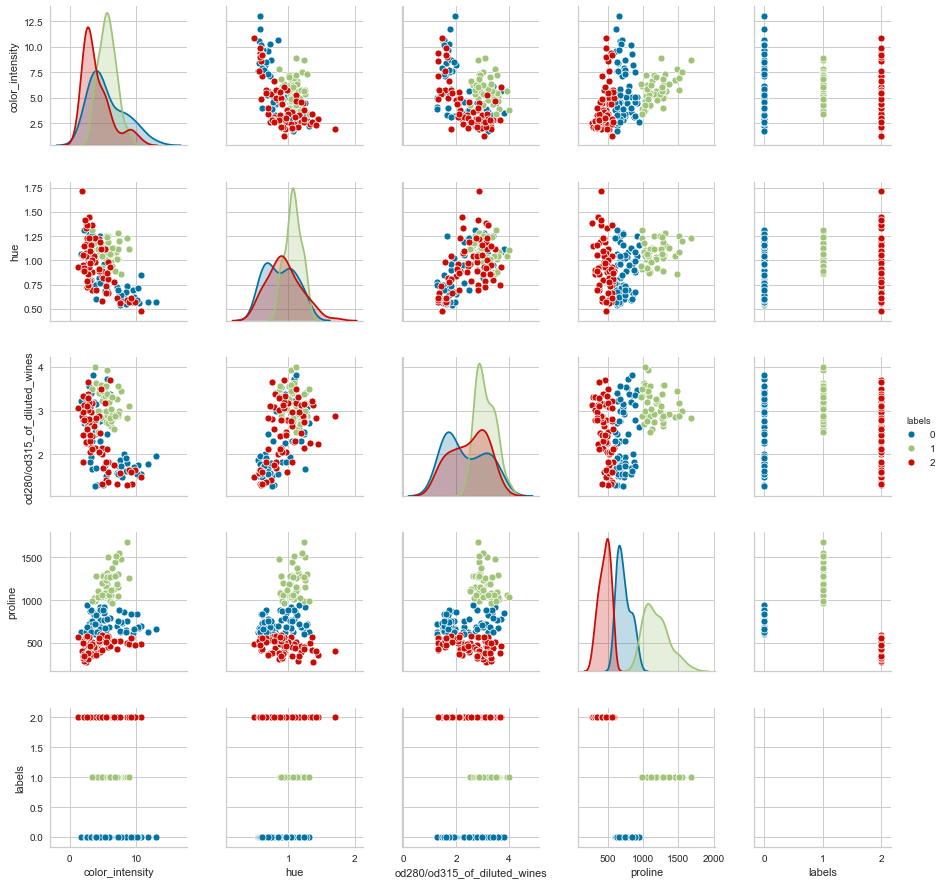

In [25]:
#Cuarto bin

sns.pairplot(X[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

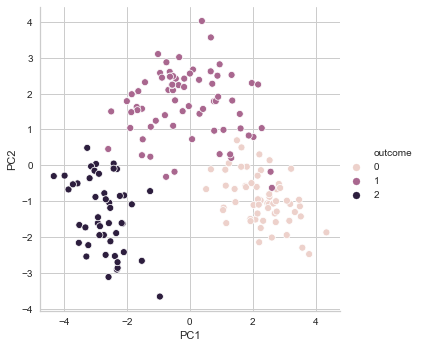

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
pc = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pca_df['outcome'] = y
sns.relplot(x='PC1', y='PC2', hue='outcome', data=pca_df )